In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Descargamos el df procesado anteriormente mediante ETL

In [3]:
df = pd.read_csv(r'C:\Users\rubio\Documents\SoyHenry\Proyecto_individual_2\df_eda')

### Analizamos aspectos basicos del dataset

In [23]:
print(f'Tamaño del dataset: {df.shape}')
print(f'las columnas del dataset son:{df.columns}')

Tamaño del dataset: (45476, 28)
las columnas del dataset son:Index(['Unnamed: 0', 'budget', 'id', 'original_language', 'overview',
       'popularity', 'release_date', 'revenue', 'runtime', 'status', 'tagline',
       'title', 'vote_average', 'vote_count', 'collection', 'generos',
       'country', 'company', 'language', 'return', 'release_year', 'cast',
       'crew', 'id.1', 'actors', 'director', 'release_month', 'release_day'],
      dtype='object')


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         45476 non-null  int64  
 1   budget             45376 non-null  float64
 2   id                 45379 non-null  object 
 3   original_language  45368 non-null  object 
 4   overview           44438 non-null  object 
 5   popularity         45376 non-null  float64
 6   release_date       45376 non-null  object 
 7   revenue            45379 non-null  float64
 8   runtime            45130 non-null  float64
 9   status             45296 non-null  object 
 10  tagline            20398 non-null  object 
 11  title              45376 non-null  object 
 12  vote_average       45376 non-null  float64
 13  vote_count         45376 non-null  float64
 14  collection         4488 non-null   object 
 15  generos            42995 non-null  object 
 16  country            391

In [28]:
df.isnull().sum()

Unnamed: 0               0
budget                 100
id                      97
original_language      108
overview              1038
popularity             100
release_date           100
revenue                 97
runtime                346
status                 180
tagline              25078
title                  100
vote_average           100
vote_count             100
collection           40988
generos               2481
country               6311
company              11896
language              3991
return                 100
release_year           100
cast                     0
crew                     0
id.1                     0
actors                   0
director               887
release_month          100
release_day            100
dtype: int64

### Observamos la distribución de variables numéricas

C:\Users\rubio\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


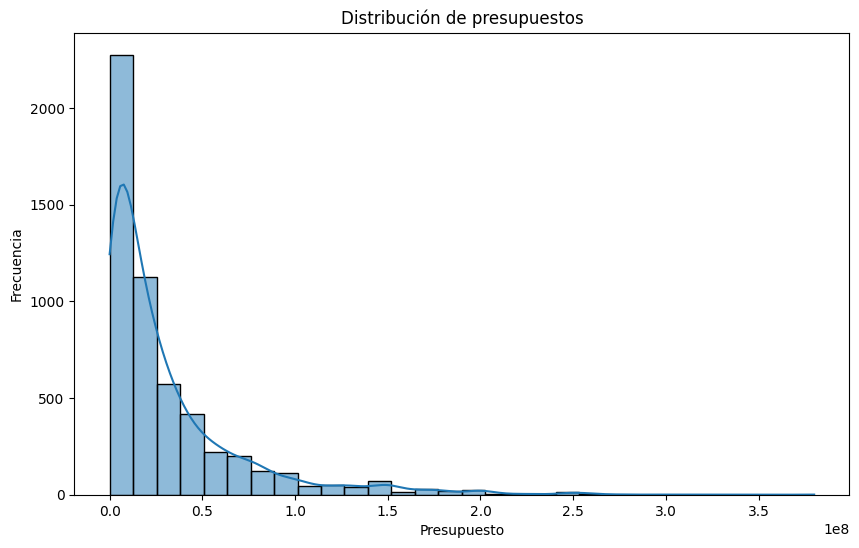

C:\Users\rubio\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


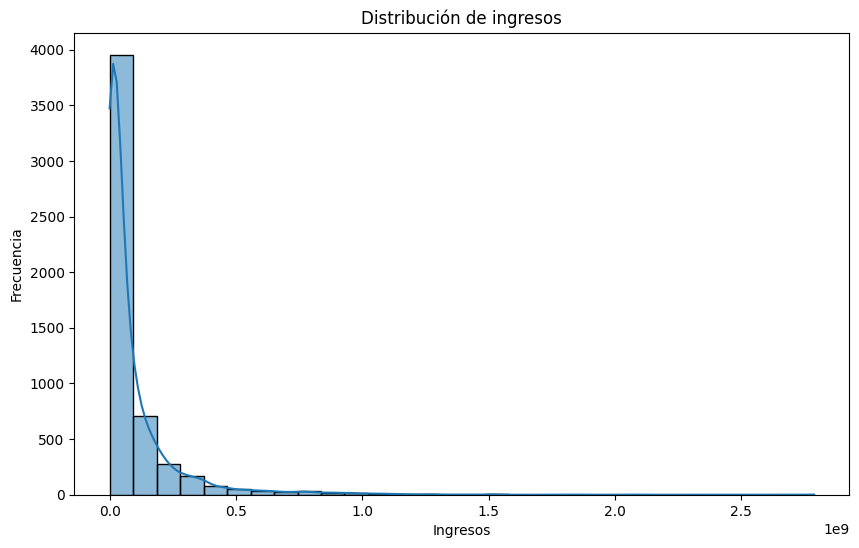

C:\Users\rubio\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


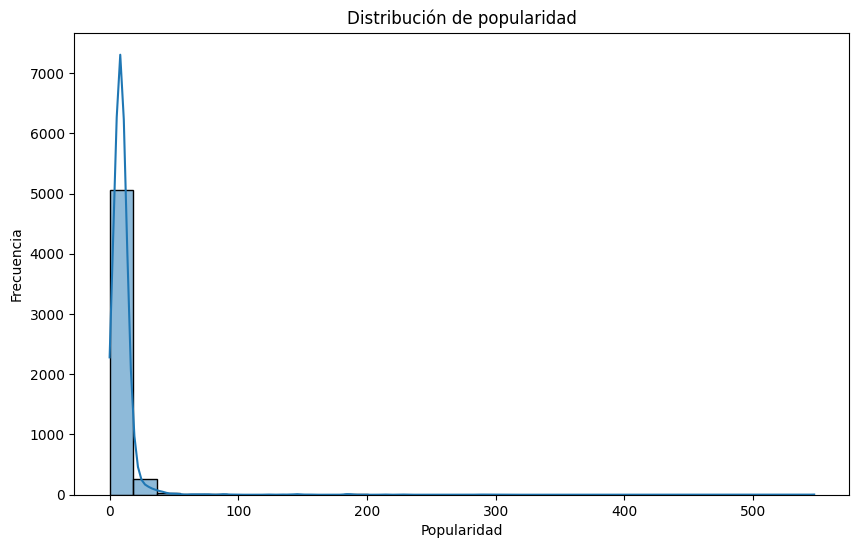

In [8]:
# Alteramos el dataframe para que los valores a evaluar no contengan el valor 0 ya que posee una cantidad desproporcionada al resto
df_alt = df[(df['budget'] > 0) & (df['revenue'] > 0) & (df['popularity'] > 0)]

# Hacemos los graficos correspondientes a los histogramas de las variables 'budget', 'revenue' y 'popularity'
plt.figure(figsize=(10, 6))
sns.histplot(df_alt['budget'], bins=30, kde=True)
plt.title('Distribución de presupuestos')
plt.xlabel('Presupuesto')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_alt['revenue'], bins=30, kde=True)
plt.title('Distribución de ingresos')
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_alt['popularity'], bins=30, kde=True)
plt.title('Distribución de popularidad')
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')
plt.show()

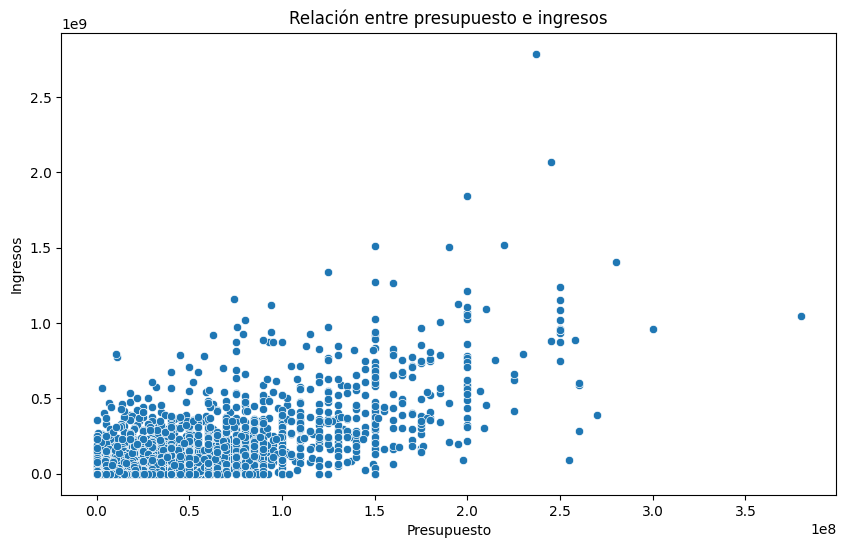

In [13]:
# Analizamos la relacion de presupuestos e ingresos para ver que tanto rindieron las peliculas en general
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=df)
plt.title('Relación entre presupuesto e ingresos')
plt.xlabel('Presupuesto')
plt.ylabel('Ingresos')
plt.show()

### Vemos la distribución de películas por año de estreno

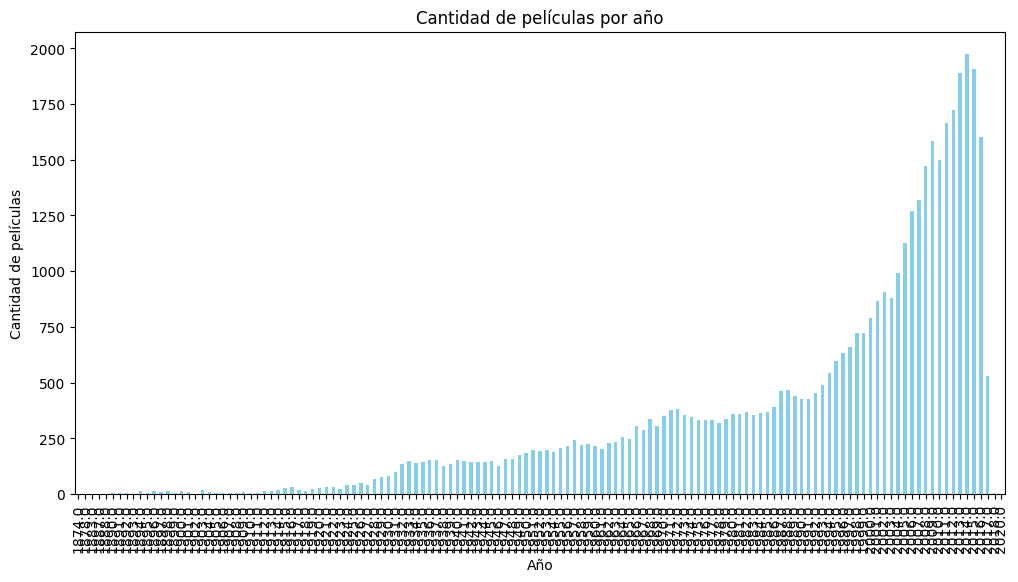

In [12]:
plt.figure(figsize=(12, 6))
df['release_year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Cantidad de películas por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de películas')
plt.show()

### Analisis de los directores

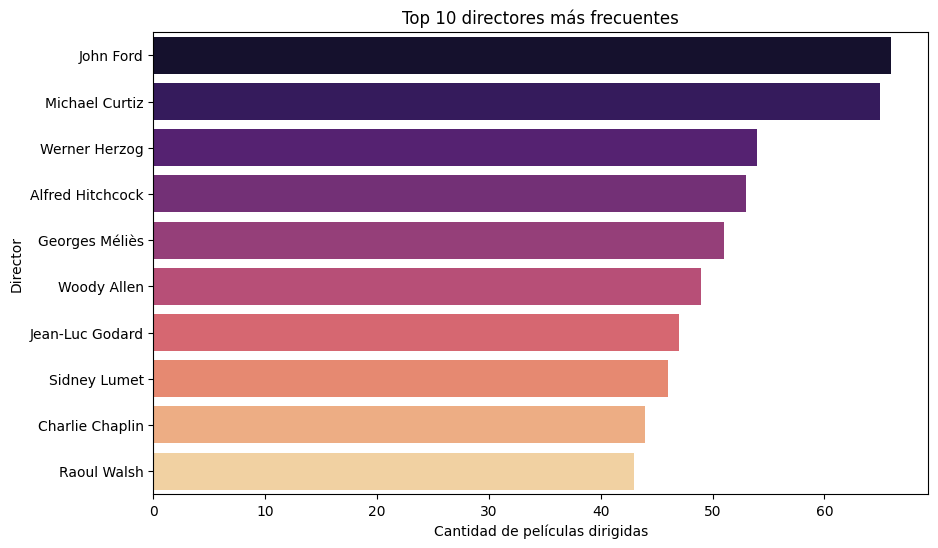

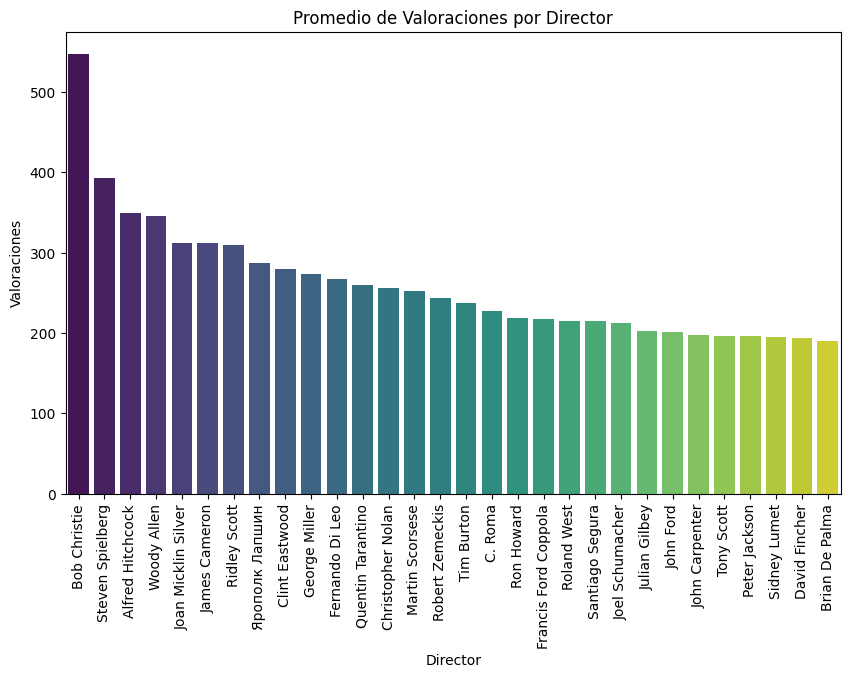

In [17]:
# Analizamos los directores para ver quienes son los mas frecuentes
directors_series = df['director'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=directors_series.values, y=directors_series.index, palette='magma')
plt.title('Top 10 directores más frecuentes')
plt.xlabel('Cantidad de películas dirigidas')
plt.ylabel('Director')
plt.show()

# Analizamos la popularidad total lograda por los directores
dir_avg_score = df.groupby('director')['popularity'].sum().reset_index() 
directors = dir_avg_score.sort_values(by='popularity', ascending=False).head(30)

plt.figure(figsize=(10,6))
sns.barplot(x='director',y='popularity', data=directors, palette='viridis')
plt.title('Promedio de Valoraciones por Director')
plt.xlabel('Director')
plt.ylabel('Valoraciones')
plt.xticks(rotation=90)
plt.show()


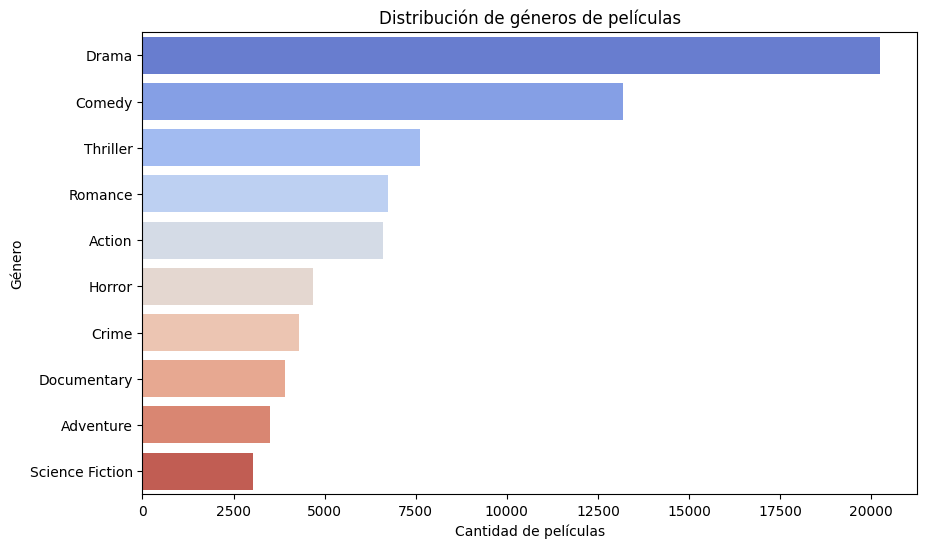

In [18]:
# Analizamos los generos separando cada uno cuando la pelicula en cuestion tiene varios
genres_series = df['generos'].str.split(', ').explode().value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=genres_series.values, y=genres_series.index, palette='coolwarm')
plt.title('Distribución de géneros de películas')
plt.xlabel('Cantidad de películas')
plt.ylabel('Género')
plt.show()

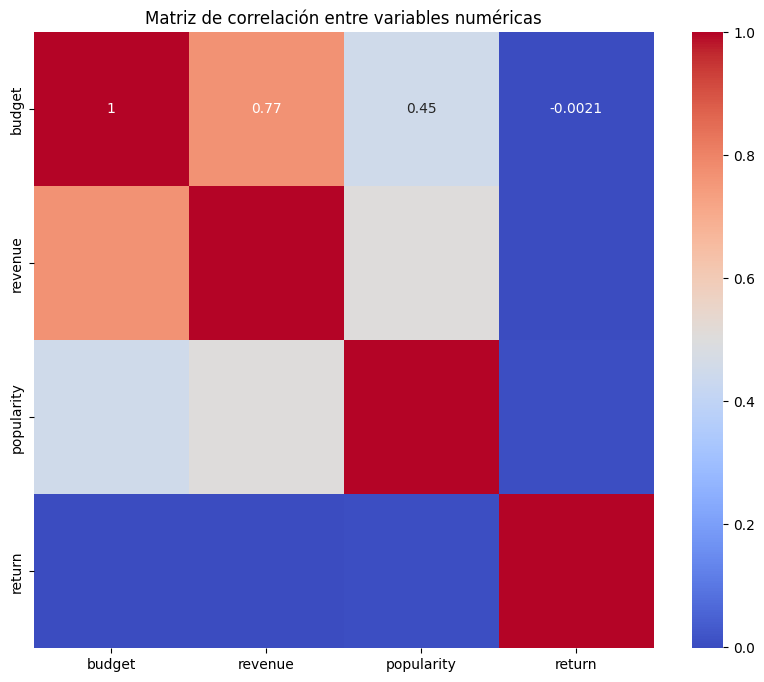

In [19]:
# Analizamos la correlacion entre algunas variables de caracter numerico
plt.figure(figsize=(10, 8))
sns.heatmap(df[['budget', 'revenue', 'popularity', 'return']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()